In [1]:
from cell_model import GraphEvolution

from cell_training import run_single, run_single_recursive

import torch

import pickle as pkl

c:\Users\gille\miniconda3\envs\geom\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = GraphEvolution(in_channels=4, out_channels=4, hidden_channels=32, dropout=0.05, edge_dim=2+4+4*2, messages=3, wrap=True)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

rval, edge_index, edge_attr, batch_edge, border, params = pkl.load(open('sample.pkl', 'rb'))

good_prediction = torch.concat((torch.zeros_like(rval[:,:,:4]), torch.zeros_like(rval[:,:,:4])), dim=2)
good_prediction[:, :, ::2] = rval[:, :, :4]
good_prediction[:, :, 1::2] = good_prediction[:, :, 1::2]  - 5

medium_prediction = torch.clone(good_prediction)
medium_prediction[:, :, 1::2] = medium_prediction[:, :, 1::2]  + 1

bad_prediction = torch.clone(good_prediction)
bad_prediction[:, :, 1::2] = bad_prediction[:, :, 1::2]  + 2

tensor(0.0067)
tensor(0.0183)
tensor(0.0498)
Loss0 : tensor(-376474., requires_grad=True)
Loss1 : tensor(-292327.0312, requires_grad=True)
Loss2 : tensor(-209297.0469, requires_grad=True)


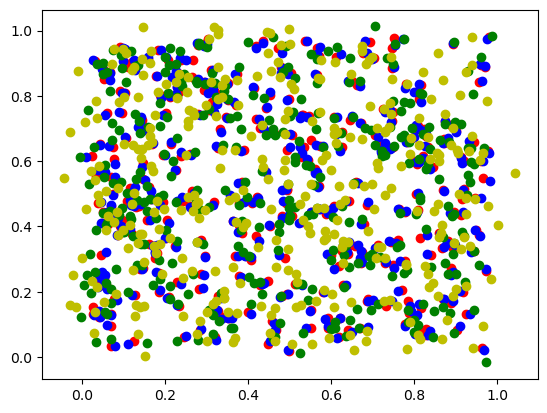

In [4]:
loss0, out0 = model.loss_direct(good_prediction, rval[:,:,:4])
loss1, out1 = model.loss_direct(medium_prediction, rval[:,:,:4])
loss2, out2 = model.loss_direct(bad_prediction, rval[:,:,:4])

print("Loss0 :", loss0)
print("Loss1 :", loss1)
print("Loss2 :", loss2)

#scatter the first two channels of each for time step 0
import matplotlib.pyplot as plt 

plt.scatter(rval[0,:,0], rval[0,:,1], c='r')
plt.scatter(out0[0,:,0], out0[0,:,1], c='b')
plt.scatter(out1[0,:,0], out1[0,:,1], c='g')
plt.scatter(out2[0,:,0], out2[0,:,1], c='y')


In [5]:
from cell_utils import make_animation

make_animation((out0, rval), animation_name='good_prediction.mp4', show_speed=False)

In [2]:
import torch

a = torch.tensor([1,2,3,4,5,6,7,8,9,10])
b = torch.tensor([1,2,3,4,5,6,7,8,9,10])

print(a[::2][:2])

a[::2][:2] = a[::2][:2] + b[:2]

print(a)

tensor([1, 3])
tensor([ 2,  2,  5,  4,  5,  6,  7,  8,  9, 10])
